In [716]:
import pandas as pd
import numpy as np
import librosa
import os
import matplotlib.pyplot as plt

# Загрузка данных

In [717]:
GENDER = "all2"
DATA_PATH = f"../markup/data_{GENDER}.csv"
INFO_PATH = f"../markup/data_{GENDER}_rating.csv"
POOL_PATH = "../resources"
CACHE_PATH_SUF = ""

SAMPLE_RATE = 16000
AUDIO_LENGTH = 10

In [718]:
data = pd.read_csv(DATA_PATH)
data = data[data["result"] != 0].reset_index(drop=True)

data

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,result,validation
0,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,5fcb36b9770f8935486ef0641ed1f2a0,pool_31406360_14-02-2022_13-22-20/assignment_0...,566843,726843,1,False
1,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,be1d5a2a35400cf4b7fd684577b0175e,pool_31546717_14-02-2022_13-22-52/assignment_0...,1215940,1375940,1,False
2,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,44617ee2c5d73df66092a16d5f31cc01,pool_31406360_14-02-2022_13-22-20/assignment_0...,1267671,1427671,1,False
3,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,7e553d5d1761cc421ed1ed14986867de,pool_31546717_14-02-2022_13-22-52/assignment_0...,647058,807058,1,False
4,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,287e1d3017044a26477c01a3d57c4639,pool_31406360_14-02-2022_13-22-20/assignment_0...,233598,393598,1,False
...,...,...,...,...,...,...,...,...,...,...
5124,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,a570a9df23262ef546c709eb80695136,pool_31406799_14-02-2022_13-22-34/assignment_0...,367383,527383,1,True
5125,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,eb662e15aeece4cac960b4d255e8e87a,pool_31406799_14-02-2022_13-22-34/assignment_0...,1326372,1486372,1,True
5126,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,f0973c26e7048597a4a90dfa0b3321b4,pool_31546723_14-02-2022_13-23-16/assignment_0...,436056,596056,1,True
5127,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,9afd8ad58a1d3963145846cae2800e07,pool_31546723_14-02-2022_13-23-16/assignment_0...,829021,989021,1,True


In [719]:
data_rows = []
for idx, row in data.iterrows():
    cur = row
    if cur["result"] < 0:
        cur["author_first"], cur["author_second"] = cur["author_second"], cur["author_first"]
        cur["voice_first"], cur["voice_second"] = cur["voice_second"], cur["voice_first"]
        cur["L_first"], cur["L_second"] = cur["L_second"], cur["L_first"]
        cur["R_first"], cur["R_second"] = cur["R_second"], cur["R_first"]
    data_rows.append(cur)
data_formated = pd.DataFrame(data_rows, columns=list(data.columns))
data_formated.drop(columns=["result"], inplace=True)

data_formated

,author_first,voice_first,L_first,R_first,author_second,voice_second,L_second,R_second,validation
0,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,5fcb36b9770f8935486ef0641ed1f2a0,pool_31406360_14-02-2022_13-22-20/assignment_0...,566843,726843,False
1,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,be1d5a2a35400cf4b7fd684577b0175e,pool_31546717_14-02-2022_13-22-52/assignment_0...,1215940,1375940,False
2,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,44617ee2c5d73df66092a16d5f31cc01,pool_31406360_14-02-2022_13-22-20/assignment_0...,1267671,1427671,False
3,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,7e553d5d1761cc421ed1ed14986867de,pool_31546717_14-02-2022_13-22-52/assignment_0...,647058,807058,False
4,45149d0601965b1ecd8ed80e6871e613,pool_31546717_14-02-2022_13-22-52/assignment_0...,304474,464474,287e1d3017044a26477c01a3d57c4639,pool_31406360_14-02-2022_13-22-20/assignment_0...,233598,393598,False
...,...,...,...,...,...,...,...,...,...
5124,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,a570a9df23262ef546c709eb80695136,pool_31406799_14-02-2022_13-22-34/assignment_0...,367383,527383,True
5125,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,eb662e15aeece4cac960b4d255e8e87a,pool_31406799_14-02-2022_13-22-34/assignment_0...,1326372,1486372,True
5126,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,f0973c26e7048597a4a90dfa0b3321b4,pool_31546723_14-02-2022_13-23-16/assignment_0...,436056,596056,True
5127,7a4a9c37969d856feefe9ec02413cc18,pool_31406799_14-02-2022_13-22-34/assignment_0...,1157778,1317778,9afd8ad58a1d3963145846cae2800e07,pool_31546723_14-02-2022_13-23-16/assignment_0...,829021,989021,True


In [575]:
from tqdm.notebook import tqdm 
import warnings

audiofiles = dict()

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for idx, row in tqdm(list(pd.read_csv("../markup/data_female4.csv").iterrows())):
        for number in ["first", "second"]:
            voice = row[f"voice_{number}"]
            if voice not in audiofiles:
                audiofiles[voice] = librosa.load(os.path.join(POOL_PATH, voice), sr=SAMPLE_RATE)[0]
    for idx, row in tqdm(list(pd.read_csv("../markup/data_male.csv").iterrows())):
        for number in ["first", "second"]:
            voice = row[f"voice_{number}"]
            if voice not in audiofiles:
                audiofiles[voice] = librosa.load(os.path.join(POOL_PATH, voice), sr=SAMPLE_RATE)[0]

  0%|          | 0/6084 [00:00<?, ?it/s]

  0%|          | 0/1074 [00:00<?, ?it/s]

In [680]:
def get_audio(audio_key):
    try: 
        return audiofiles[audio_key[0]]
    except KeyError:
        print("FileNotFoundError", audio_key[0])
        raise

def get_audio_LR(audio_key):
    try: 
        return get_audio(audio_key)[audio_key[1]: audio_key[2]]
    except KeyError:
        pass

In [681]:
data_train = pd.DataFrame(data_formated.loc[~data["validation"]], columns=data_formated.columns)
data_train = data_train.reset_index(drop=True)

data_test = pd.DataFrame(data_formated.loc[data["validation"]], columns=data_formated.columns).reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

print("Validation size %.3f, train size %.3f" % (len(data_test) / len(data), len(data_train) / len(data)))

Validation size 0.206, train size 0.794


In [682]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Создание данных

In [720]:
import sys
sys.path.append('..')

In [721]:
import torch
import utils.feature_generators as fgen

from torch.utils.data import DataLoader
from collections import defaultdict
from utils.feature_usage import FeatureExtractor, SoundDataset
from utils.model_evaluation import Evaluator

In [685]:
temp_feature_generator = fgen.TempFeatureGenerator()
emotions_generator = fgen.EmotionsFeatureGenerator(os.path.join(POOL_PATH, "speech_to_text_plus_emotions.json"))
denoiser = fgen.Denoiser()

Using cache found in /Users/voidmax/.cache/torch/hub/facebookresearch_denoiser_main


In [722]:

feature_extractor = FeatureExtractor(
    get_audio_LR, 
    feature_family=[
        (temp_feature_generator, [
            "temp_letters", 
        ]),
        (fgen.SimpleFeatureGenerator(), [
            "audio_entropy"
        ]),
        (fgen.SreFeatureGenerator(), [
            "loudness_mean", "loudness_std",
        ]),
        (fgen.LibrosaFeatureGenerator(), [
            "librosa_mfccs_mean", "librosa_rms_mean"
        ]),
        (fgen.SpectralFeatureGenerator(), [
            'sprectral_nobs', 'sprectral_skew_old',
            'sprectral_q75',
        ])
    ]
)

# temp_letters                   mean = 0.50654 	std = 0.10028
# audio_entropy                  mean = 0.16308 	std = 0.07219
# f0_mean                        mean = 0.03815 	std = 0.05120
# f0_std                         mean = 0.02125 	std = 0.03024
# f0_mean_der                    mean = 0.01387 	std = 0.02091
# loudness_mean                  mean = 0.64748 	std = 0.10139
# loudness_std                   mean = 0.22366 	std = 0.09306
# loudness_mean_der              mean = 0.08377 	std = 0.06825
# librosa_mfccs_mean             mean = 0.44233 	std = 0.09250
# librosa_rms_mean               mean = 0.45386 	std = 0.09713
# librosa_chroma_mean            mean = 0.05059 	std = 0.06380
# librosa_tonnetz_mean           mean = 0.01187 	std = 0.01235
# librosa_spec_bw_mean           mean = 0.01288 	std = 0.01771
# librosa_flatness_mean          mean = 0.03547 	std = 0.05261
# librosa_chroma_std             mean = 0.01094 	std = 0.01322
# librosa_tonnetz_std            mean = 0.07716 	std = 0.07576
# librosa_chroma_cens_std        mean = 0.03764 	std = 0.04026
# librosa_spec_bw_std            mean = 0.01878 	std = 0.02770
# negative                       mean = 0.01294 	std = 0.02236
# positive                       mean = 0.02824 	std = 0.04175
# sprectral_nobs                 mean = 0.12095 	std = 0.09358
# sprectral_skew_old             mean = 0.33035 	std = 0.11092
# sprectral_kurtosis             mean = 0.01509 	std = 0.01841
# sprectral_std                  mean = 0.05280 	std = 0.05005
# sprectral_q25                  mean = 0.01990 	std = 0.03266
# sprectral_q75                  mean = 0.17030 	std = 0.09065


# feature_extractor = FeatureExtractor(
#     get_audio_LR, transform=denoiser.denoise, 
#     feature_family=[
#         (temp_feature_generator, [
#             "temp_letters", 
#         ]),
#         (fgen.SreFeatureGenerator(), [
#             "loudness_mean", "loudness_std",
#         ]),
#         (fgen.LibrosaFeatureGenerator(), [
#             "librosa_chroma_cens_mean",
#         ]),
#         (fgen.SpectralFeatureGenerator(), [
#             # 'sprectral_nobs',      
#             # 'sprectral_magic',
#             'sprectral_skew_old' 
#         ])
#     ]
# )

In [724]:
info = pd.read_csv(INFO_PATH)

info_train = info[~info["validation"]].reset_index(drop=True)
dataset_train = SoundDataset(data_train, feature_extractor, cache_path=f"cache/features_train{CACHE_PATH_SUF}.csv")
dataloader_train = DataLoader(dataset_train, batch_size=1, shuffle=True)
evaluator_train = Evaluator(dataset_train, info_train)

info_test = info[info["validation"]].reset_index(drop=True)
dataset_test = SoundDataset(data_test, feature_extractor, cache_path=f"cache/features_test{CACHE_PATH_SUF}.csv")
dataloader_test = DataLoader(dataset_test, batch_size=1, shuffle=True)
evaluator_test = Evaluator(dataset_test, info_test)

for d in tqdm(dataloader_train):
    pass
dataset_train.cache_save()

for d in tqdm(dataloader_test):
    pass
dataset_test.cache_save()

  0%|          | 0/4074 [00:00<?, ?it/s]

  0%|          | 0/1055 [00:00<?, ?it/s]

In [725]:
cross_data_train = []
cross_dataset_train = []
cross_dataloader_train = []
cross_evaluator_train = []

cross_data_valid = []
cross_dataset_valid = []
cross_dataloader_valid = []
cross_evaluator_valid = []

CROSS_VALIDATION_SIZE = 5
CROSS_VALIDATION_ATTEMPTS = 10

for _ in range(CROSS_VALIDATION_ATTEMPTS):
    authors = set()
    for idx, row in data_train.iterrows():
        authors.add(row["author_first"])
        authors.add(row["author_second"])
    authors = list(authors)
    while len(authors) % CROSS_VALIDATION_SIZE != 0:
        authors.append("")
    authors = np.array(authors).reshape(CROSS_VALIDATION_SIZE, -1)

    for i in range(CROSS_VALIDATION_SIZE):
        cur_data = data_train.copy()
        cur_info = info_train.copy()
        for author in authors[i]:
            cur_data = cur_data[(cur_data["author_first"] != author) & (cur_data["author_second"] != author)]
            cur_info = cur_info[cur_info["author"] != author]
        cur_data = cur_data.reset_index(drop=True)
        cur_info = cur_info.reset_index(drop=True)

        cross_data_train.append(cur_data)
        cross_dataset_train.append(SoundDataset(cur_data, feature_extractor, cache_path=f"cache/features_train{CACHE_PATH_SUF}.csv"))
        cross_dataloader_train.append(DataLoader(cross_dataset_train[-1], batch_size=1, shuffle=True))
        cross_evaluator_train.append(Evaluator(cross_dataset_train[-1], cur_info))

    for i in range(CROSS_VALIDATION_SIZE):
        cur_data = []
        cur_info = []
        for idx, row in data_train.iterrows():
            if row["author_first"] in authors[i] and row["author_second"] in authors[i]:
                cur_data.append(row)
        for idx, row in info_train.iterrows():
            if row["author"] in authors[i]:
                cur_info.append(row)
        cur_data = pd.DataFrame(cur_data, columns=data_train.columns).reset_index(drop=True)
        cur_info = pd.DataFrame(cur_info, columns=info_train.columns).reset_index(drop=True)

        cross_data_valid.append(cur_data)
        cross_dataset_valid.append(SoundDataset(cur_data, feature_extractor, cache_path=f"cache/features_train{CACHE_PATH_SUF}.csv"))
        cross_dataloader_valid.append(DataLoader(cross_dataset_valid[-1], batch_size=1, shuffle=True))
        cross_evaluator_valid.append(Evaluator(cross_dataset_valid[-1], cur_info))

In [726]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df_train = []
for idx, f in enumerate(dataloader_train.dataset):
    df_train.append(f[0])
    df_train.append(f[1])
    if idx + 1 == len(dataloader_train.dataset):
        break

df_train = pd.DataFrame(df_train)
scaler = Pipeline([
    ("scaler", StandardScaler()),
    # ("PCA", PCA(n_components=4))
]).fit(df_train)

In [727]:
tmp = pd.DataFrame(scaler.transform(df_train), columns=feature_extractor.get_feature_names()).corr()

bad_rate = defaultdict(int)

for f1 in feature_extractor.get_feature_names():
    for idx, f2 in enumerate(feature_extractor.get_feature_names()):
        if f2 <= f1:
            continue
        corr = np.abs(tmp[f1][f2])
        if corr > 0.8:
            bad_rate[f1] += 1
            bad_rate[f2] += 1
            print(f1, f2, corr)

tmp

librosa_mfccs_mean loudness_mean 0.8026686828367513


,temp_letters,audio_entropy,loudness_mean,loudness_std,librosa_mfccs_mean,librosa_rms_mean,sprectral_nobs,sprectral_skew_old,sprectral_q75
temp_letters,1.000000,0.528392,0.549184,-0.643135,0.363510,0.243137,0.225872,-0.002423,0.172952
audio_entropy,0.528392,1.000000,0.547182,-0.506317,0.373753,0.330376,0.415937,0.249361,0.187591
loudness_mean,0.549184,0.547182,1.000000,-0.613559,0.802669,0.782543,0.109611,-0.095593,0.227709
loudness_std,-0.643135,-0.506317,-0.613559,1.000000,-0.433206,-0.217113,-0.245182,0.128554,-0.100605
librosa_mfccs_mean,0.363510,0.373753,0.802669,-0.433206,1.000000,0.693486,0.215808,-0.020049,-0.042048
librosa_rms_mean,0.243137,0.330376,0.782543,-0.217113,0.693486,1.000000,-0.021373,-0.041638,0.266845
sprectral_nobs,0.225872,0.415937,0.109611,-0.245182,0.215808,-0.021373,1.000000,0.495857,-0.285583
sprectral_skew_old,-0.002423,0.249361,-0.095593,0.128554,-0.020049,-0.041638,0.495857,1.000000,-0.152399
sprectral_q75,0.172952,0.187591,0.227709,-0.100605,-0.042048,0.266845,-0.285583,-0.152399,1.000000


In [728]:
for key, value in bad_rate.items():
    print(key, value)

librosa_mfccs_mean 1
loudness_mean 1


# Обучение модели

In [729]:
import torch 
import torch.nn as nn

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

class SmallModel(nn.Module):
    def __init__(self, W):
        super().__init__()

        self.MLP = nn.Sequential(
            nn.Linear(W, 1, bias=False),
            # nn.LeakyReLU(0.1),
            # nn.Linear(8, 1, bias=False),
        )
        
    def forward(self, input):
        if len(input.shape) == 1:
            input = input.reshape(1, -1)
        return self.MLP(torch.Tensor(scaler.transform(input))).view(-1)

    def compare(self, d):
        L, R = self(d[0]), self(d[1])
        values = torch.stack([L, R], dim=-1)
        values = nn.functional.softmax(values, dim=-1)
        return values

In [730]:
def plot_history(history, xlabel, title):
    for data in ["train", "test", "valid"]:
        if data not in history:
            continue
        cross_history = np.array(history[data])
        mean, std = cross_history.mean(axis=0), cross_history.std(axis=0)
        plt.plot(range(1, len(mean)), mean[1:], label=data, linewidth=2)
        plt.fill_between(range(1, len(mean)), (mean - std)[1:], (mean + std)[1:], alpha=.25)
    plt.title(title)
    plt.grid()
    plt.xlabel(xlabel)
    plt.legend()

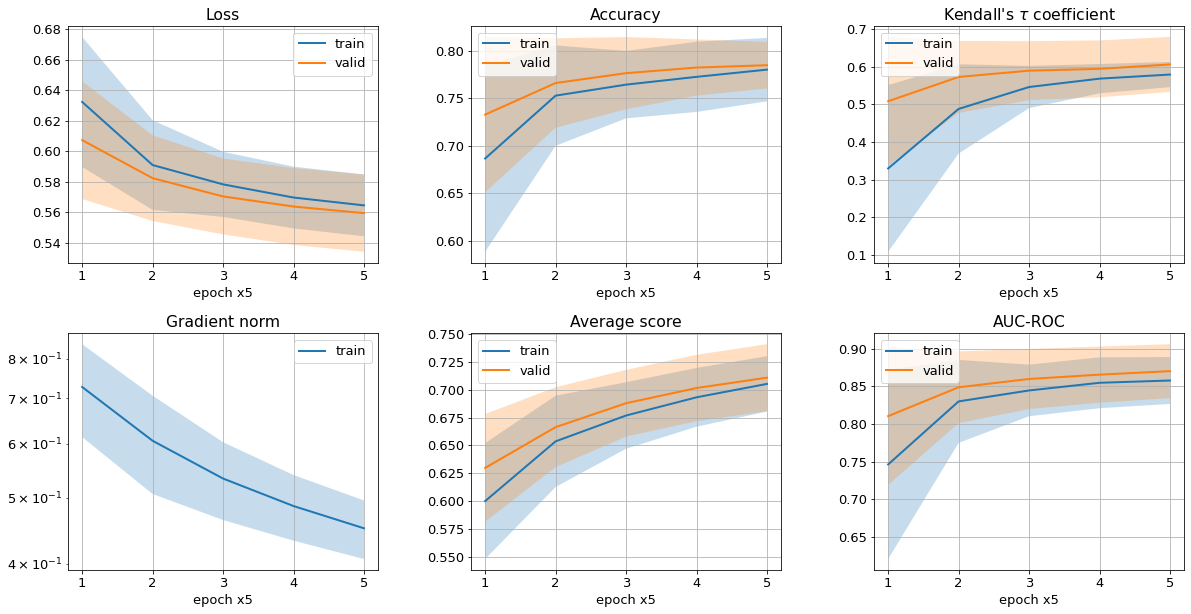

  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [714]:
from IPython.display import clear_output
from sklearn.metrics import roc_auc_score
from copy import deepcopy


USING_CROSS_VALIDATION_SIZE = CROSS_VALIDATION_SIZE * CROSS_VALIDATION_ATTEMPTS

reg_coef = 0.01
regularization = lambda x: reg_coef * torch.abs(x).sum()
# regularization = lambda x: reg_coef * (x**2).sum()

model = [SmallModel(W=scaler.transform(df_train).shape[1]).to(device) for i in range(USING_CROSS_VALIDATION_SIZE)]
optimizer = [torch.optim.Adam(model[i].parameters(), lr=1e-3) for i in range(USING_CROSS_VALIDATION_SIZE)]

cross_history = defaultdict(lambda: defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)]))

times = 5
xlabel = f"epoch x{times}"


def eval(evaluator, model, dataloader):
    combined = defaultdict(list)
    with torch.no_grad():
        evaluator.evaluate(lambda x: model(x).item())
        combined["kendall_coefficients"].append(evaluator.kendall_coefficients())
        model.eval()
        y_score = []
        y_true = []
        for d in dataloader:
            values = model.compare(d)
            y_score.append(values[0][0].item())
            y_true.append(1)
            y_score.append(values[0][1].item())
            y_true.append(0)

            loss = nn.functional.cross_entropy(values, torch.zeros(values.shape[0], dtype=int))
            for layer in model.parameters():
                loss += regularization(layer)
            # loss += reg_coef * ((list(model.parameters())[0])**2).sum()

            combined["loss"].append(loss.item())
            combined["average_score"].append(values[:, 0].mean().item())
            combined["accuracy"].append(((values[:, 0] > 0.5).float().mean() + 0.5 * (values[:, 0] == 0.5).float().mean()).item())
        
        combined["roc-auc"].append(roc_auc_score(y_true, y_score))
        model.train()
    return combined


def train(evaluator, model, dataset):
    combined = defaultdict(list)
    evaluator.evaluate(lambda x: model(x).item())
    combined["kendall_coefficients"].append(evaluator.kendall_coefficients())
    for t in range(times):
        y_score = []
        y_true = []
        for d in dataset.generator():
            values = model.compare(d)
            y_score.append(values[0][0].item())
            y_true.append(1)
            y_score.append(values[0][1].item())
            y_true.append(0)

            loss = nn.functional.cross_entropy(values, torch.zeros(values.shape[0], dtype=int))
            for layer in model.parameters():
                loss += regularization(layer)
            # loss += reg_coef * ((list(model.parameters())[0])**2).sum()

            combined["loss"].append(loss.item())
            combined["accuracy"].append(((values[:, 0] > 0.5).float().mean() + 0.5 * (values[:, 0] == 0.5).float().mean()).item())
            combined["average_score"].append(values[:, 0].mean().item())

            optimizer[i].zero_grad()
            loss.backward()
            combined["grad_norm"].append(torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5).item())
            optimizer[i].step()

        combined["roc-auc"].append(roc_auc_score(y_true, y_score))
    combined["model"].append(deepcopy(model))
    return combined


for epoch in range(50):
    for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
        # combined = eval(evaluator_test, model[i], dataloader_test)
        # for key, value in combined.items():
        #     cross_history[key]["test"][i].append(np.mean(value))

        combined = train(cross_evaluator_train[i], model[i], cross_dataset_train[i])
        for key, value in combined.items():
            if key == "model":
                cross_history[key]["train"][i].append(value)
            else:
                cross_history[key]["train"][i].append(np.mean(value))

        combined = eval(cross_evaluator_valid[i], model[i], cross_dataloader_valid[i])
        for key, value in combined.items():
            cross_history[key]["valid"][i].append(np.mean(value))
    
    clear_output(True)
    plt.figure(figsize=[20, 10])
    plt.rc('font', size=13)
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    plt.subplot(2, 3, 1)
    plot_history(cross_history["loss"], title="Loss", xlabel=xlabel)
    
    plt.subplot(2, 3, 3)
    plot_history(cross_history["kendall_coefficients"], title="Kendall's $\\tau$ coefficient", xlabel=xlabel)

    plt.subplot(2, 3, 2)
    plot_history(cross_history["accuracy"], title="Accuracy", xlabel=xlabel)

    plt.subplot(2, 3, 4)
    plot_history(cross_history["grad_norm"], title="Gradient norm", xlabel=xlabel)
    plt.yscale("log")

    plt.subplot(2, 3, 5)
    plot_history(cross_history["average_score"], title="Average score", xlabel=xlabel)

    plt.subplot(2, 3, 6)
    plot_history(cross_history["roc-auc"], title="AUC-ROC", xlabel=xlabel)

    plt.show()
    # break

# Результаты модели

Метрики на валидации:

In [715]:
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(cross_evaluator_valid[i], model[i], cross_dataloader_valid[i])
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.60966 	std = 0.07089
loss                           mean = 0.55759 	std = 0.02522
average_score                  mean = 0.71463 	std = 0.02972
accuracy                       mean = 0.78640 	std = 0.02465
roc-auc                        mean = 0.87253 	std = 0.03506


Метрики на тесте:

In [676]:
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(evaluator_test, model[i], dataloader_test)
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.74933 	std = 0.03436
loss                           mean = 0.50664 	std = 0.01363
average_score                  mean = 0.80050 	std = 0.01611
accuracy                       mean = 0.85420 	std = 0.02174
roc-auc                        mean = 0.91377 	std = 0.01696


In [253]:
best_id = np.array(cross_history["kendall_coefficients"]["valid"]).sum(axis=0).argmax()
best_models = [cross_history["model"]["train"][i][best_id][0] for i in range(USING_CROSS_VALIDATION_SIZE)]
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(cross_evaluator_valid[i], best_models[i], cross_dataloader_valid[i])
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.63778 	std = 0.20824
loss                           mean = 0.52783 	std = 0.04630
average_score                  mean = 0.73652 	std = 0.05335
accuracy                       mean = 0.80861 	std = 0.05572
roc-auc                        mean = 0.89148 	std = 0.05966


In [248]:
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(evaluator_test, best_models[i], dataloader_test)
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.56730 	std = 0.01714
loss                           mean = 0.52961 	std = 0.00531
average_score                  mean = 0.74422 	std = 0.00718
accuracy                       mean = 0.79620 	std = 0.00863
roc-auc                        mean = 0.88049 	std = 0.00831


In [570]:
female_info = pd.read_csv("../markup/data_female4_rating.csv")
female_data = pd.read_csv("../markup/data_female4.csv")

data_rows = []
for idx, row in female_data.iterrows():
    cur = row
    if cur["result"] < 0:
        cur["author_first"], cur["author_second"] = cur["author_second"], cur["author_first"]
        cur["voice_first"], cur["voice_second"] = cur["voice_second"], cur["voice_first"]
        cur["L_first"], cur["L_second"] = cur["L_second"], cur["L_first"]
        cur["R_first"], cur["R_second"] = cur["R_second"], cur["R_first"]
    if cur["validation"]:
        data_rows.append(cur)
female_data_test = pd.DataFrame(data_rows, columns=list(data.columns))
female_data_test.drop(columns=["result"], inplace=True)

female_info_test = female_info[female_info["validation"]].reset_index(drop=True)
female_dataset_test = SoundDataset(female_data_test, feature_extractor, cache_path=f"cache/features_test{CACHE_PATH_SUF}.csv")
female_dataloader_test = DataLoader(female_dataset_test, batch_size=1, shuffle=True)
for d in tqdm(female_dataloader_test):
    pass
female_dataset_test.cache_save()
female_evaluator_test = Evaluator(female_dataset_test, female_info_test)


cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(female_evaluator_test, model[i], female_dataloader_test)
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/1134 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.45714 	std = 0.02145
loss                           mean = 0.63793 	std = 0.00537
average_score                  mean = 0.64269 	std = 0.00476
accuracy                       mean = 0.68175 	std = 0.00571
roc-auc                        mean = 0.74047 	std = 0.00805


In [611]:
male_info = pd.read_csv("../markup/data_male_rating.csv")
male_data = pd.read_csv("../markup/data_male.csv")

data_rows = []
for idx, row in male_data.iterrows():
    cur = row
    if cur["result"] < 0:
        cur["author_first"], cur["author_second"] = cur["author_second"], cur["author_first"]
        cur["voice_first"], cur["voice_second"] = cur["voice_second"], cur["voice_first"]
        cur["L_first"], cur["L_second"] = cur["L_second"], cur["L_first"]
        cur["R_first"], cur["R_second"] = cur["R_second"], cur["R_first"]
    if cur["validation"]:
        data_rows.append(cur)
male_data_test = pd.DataFrame(data_rows, columns=list(data.columns))
male_data_test.drop(columns=["result"], inplace=True)

male_info_test = male_info[male_info["validation"]].reset_index(drop=True)
male_dataset_test = SoundDataset(male_data_test, feature_extractor, cache_path=f"cache/features_test{CACHE_PATH_SUF}.csv")
male_dataloader_test = DataLoader(male_dataset_test, batch_size=1, shuffle=True)
for d in tqdm(male_dataloader_test):
    pass
male_dataset_test.cache_save()
male_evaluator_test = Evaluator(male_dataset_test, male_info_test)


cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(male_evaluator_test, model[i], male_dataloader_test)
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/315 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.66933 	std = 0.02372
loss                           mean = 0.58640 	std = 0.00299
average_score                  mean = 0.71197 	std = 0.00332
accuracy                       mean = 0.75340 	std = 0.00848
roc-auc                        mean = 0.81279 	std = 0.00471


Важность признаков:

In [697]:
imp = defaultdict(list)

for t in range(USING_CROSS_VALIDATION_SIZE):
    for name, value in zip(feature_extractor.get_feature_names(), list(model[t].parameters())[0].T.detach()):
        for v in value:
            imp[name].append(v)


w = []
for name, value in imp.items():
    value = np.array(value)
    print("{:<30}".format(name), "mean = %.5f" % np.abs(value).mean(), "\tstd = %.5f" % np.abs(value).std())
    w.append(value.mean())

temp_letters                   mean = 0.50654 	std = 0.10028
audio_entropy                  mean = 0.16308 	std = 0.07219
f0_mean                        mean = 0.03815 	std = 0.05120
f0_std                         mean = 0.02125 	std = 0.03024
f0_mean_der                    mean = 0.01387 	std = 0.02091
loudness_mean                  mean = 0.64748 	std = 0.10139
loudness_std                   mean = 0.22366 	std = 0.09306
loudness_mean_der              mean = 0.08377 	std = 0.06825
librosa_mfccs_mean             mean = 0.44233 	std = 0.09250
librosa_rms_mean               mean = 0.45386 	std = 0.09713
librosa_chroma_mean            mean = 0.05059 	std = 0.06380
librosa_tonnetz_mean           mean = 0.01187 	std = 0.01235
librosa_spec_bw_mean           mean = 0.01288 	std = 0.01771
librosa_flatness_mean          mean = 0.03547 	std = 0.05261
librosa_chroma_std             mean = 0.01094 	std = 0.01322
librosa_tonnetz_std            mean = 0.07716 	std = 0.07576
librosa_chroma_cens_std 

In [31]:
best_models = [cross_history["model"]["train"][i][np.array(cross_history["kendall_coefficients"]["valid"][i]).argmax()][0] for i in range(USING_CROSS_VALIDATION_SIZE)]
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(cross_evaluator_valid[i], best_models[i], cross_dataloader_valid[i])
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.63444 	std = 0.15035
loss                           mean = 0.56155 	std = 0.04111
average_score                  mean = 0.73896 	std = 0.05042
accuracy                       mean = 0.78659 	std = 0.03999
roc-auc                        mean = 0.86828 	std = 0.05471


In [32]:
cross_values = defaultdict(lambda: [[] for i in range(USING_CROSS_VALIDATION_SIZE)])

for i in tqdm(range(USING_CROSS_VALIDATION_SIZE)):
    combined = eval(evaluator_test, best_models[i], dataloader_test)
    for key, value in combined.items():
        cross_values[key][i].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

  0%|          | 0/50 [00:00<?, ?it/s]

kendall_coefficients           mean = 0.50190 	std = 0.04228
loss                           mean = 0.59997 	std = 0.01533
average_score                  mean = 0.70049 	std = 0.02222
accuracy                       mean = 0.73084 	std = 0.01726
roc-auc                        mean = 0.81813 	std = 0.02334


In [34]:
amodel = SmallModel(W=scaler.transform(df_train).shape[1]).to(device)
with torch.no_grad():
    amodel.MLP[0].weight[0] = torch.Tensor(w)

In [631]:
cross_values = defaultdict(lambda: [[] for i in range(1)])

combined = eval(evaluator_test, amodel, dataloader_test)
for key, value in combined.items():
    cross_values[key][0].append(np.mean(value))

for key, value in cross_values.items():
    mean, std = np.array(value).mean(axis=0), np.array(value).std(axis=0)
    print("{:<30}".format(key), "mean = %.5f" % mean, "\tstd = %.5f" % std)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x7 and 32x1)

Распределение голосов на шкале:

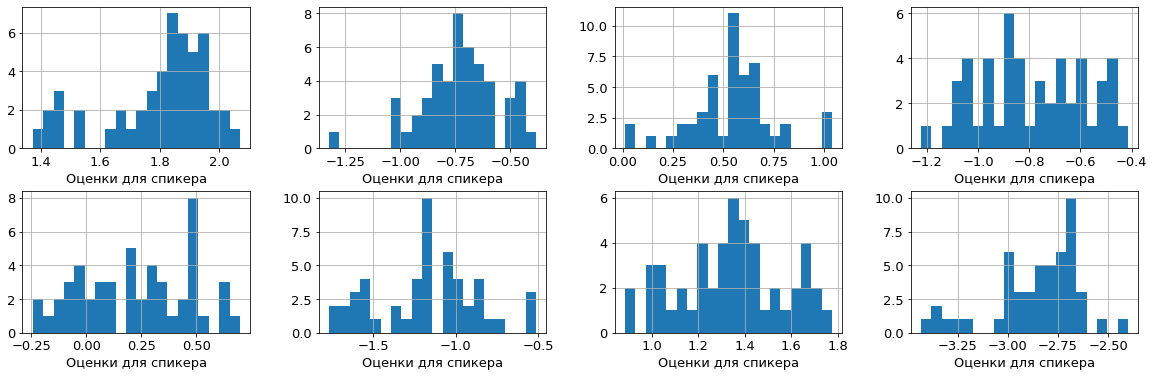

In [649]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=[20, 6])
plt.rc('font', size=13)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for idx, d in enumerate(dataset_train._cache.values()):
    res = [model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]
    
    plt.subplot(2, 4, idx + 1)
    plt.subplots_adjust()
    plt.grid()
    plt.hist(res, bins=20, label=f"Случайный женский голос {idx + 1}")
    plt.xlabel("Оценки для спикера")
    # plt.legend()
    if (idx == 7):
        break

# plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.show()

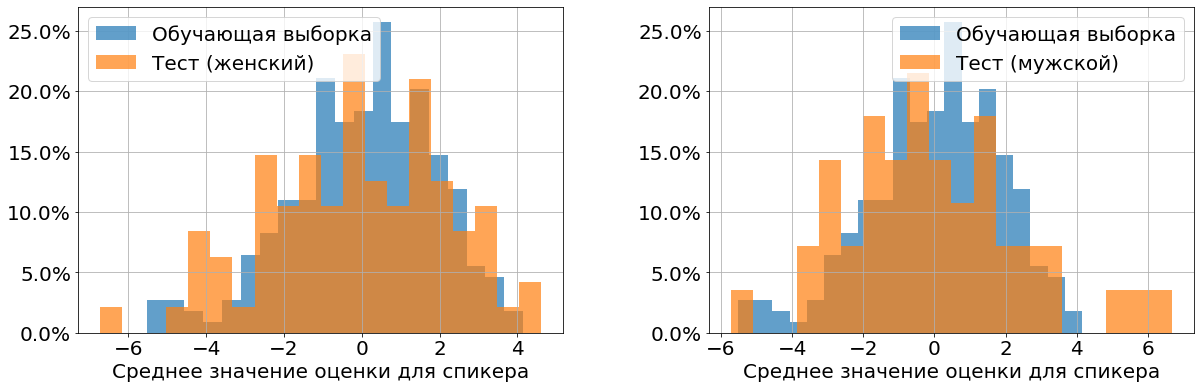

In [653]:
from matplotlib.ticker import PercentFormatter

plt.figure(figsize=[20, 6])
plt.rc('font', size=20)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(1, 2, 1)
plt.grid()
res = []
for d in dataset_train._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=20, label="Обучающая выборка", alpha=0.7, density=True)

res = []
for d in dataset_test._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=20, label="Тест (женский)", alpha=0.7, density=True)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
# res = []
# for d in male_dataset_test._cache.values():
#     res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
# plt.hist(res, bins=30, label="Тест (мужской)", alpha=0.7)

plt.xlabel("Среднее значение оценки для спикера")
plt.legend()


plt.subplot(1, 2, 2)
plt.grid()
res = []
for d in dataset_train._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=20, label="Обучающая выборка", alpha=0.7, density=True)

# res = []
# for d in dataset_test._cache.values():
#     res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
# plt.hist(res, bins=30, label="Тест (женский)", alpha=0.7, density=True)

res = []
for d in male_dataset_test._cache.values():
    res.append(np.mean([model[i](d).detach().item() for i in range(USING_CROSS_VALIDATION_SIZE)]))
plt.hist(res, bins=20, label="Тест (мужской)", alpha=0.7, density=True)

plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1))
plt.xlabel("Среднее значение оценки для спикера")
plt.legend()
plt.show()